In [1]:
pip install pandas numpy statsmodels matplotlib

Note: you may need to restart the kernel to use updated packages.


C:\Users\HELLO\AppData\Local\Temp\ipykernel_404\312122919.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(start='2020-01-01', periods=36, freq='M')


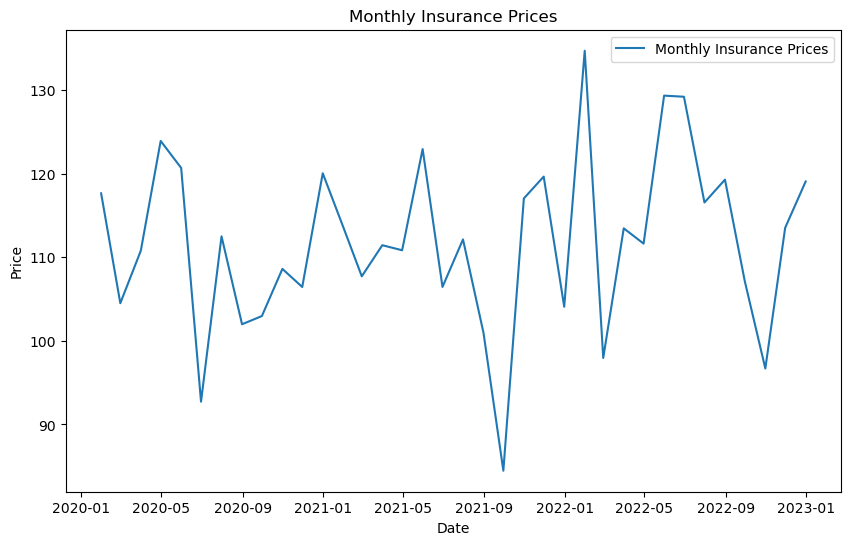

C:\Users\HELLO\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\HELLO\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\HELLO\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\HELLO\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                              Price   No. Observations:                   36
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                 -91.427
Date:                            Sun, 28 Jul 2024   AIC                            192.853
Time:                                    22:49:52   BIC                            198.531
Sample:                                01-31-2020   HQIC                           194.281
                                     - 12-31-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1321      0.292     -0.453      0.651      -0.704       0.440
ma.L1         -0.9980      7.615   

C:\Users\HELLO\AppData\Local\Temp\ipykernel_404\312122919.py:34: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=data.index[-1] + pd.DateOffset(months=1), periods=12, freq='M')


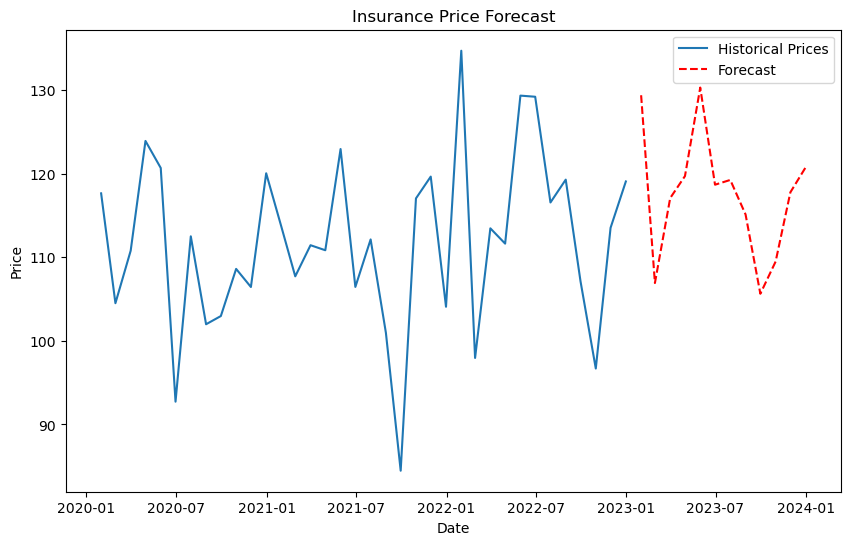

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Example data: Generate synthetic monthly insurance pricing data
np.random.seed(0)
dates = pd.date_range(start='2020-01-01', periods=36, freq='M')
prices = np.random.normal(loc=100, scale=10, size=len(dates)) + np.arange(len(dates)) * 0.5  # Trend + noise

# Create a DataFrame
data = pd.DataFrame({'Date': dates, 'Price': prices})
data.set_index('Date', inplace=True)

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(data, label='Monthly Insurance Prices')
plt.title('Monthly Insurance Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Fit an ARIMA model
model = SARIMAX(data['Price'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()

# Print model summary
print(results.summary())

# Forecast the next 12 months
forecast = results.get_forecast(steps=12)
forecast_index = pd.date_range(start=data.index[-1] + pd.DateOffset(months=1), periods=12, freq='M')
forecast_df = pd.DataFrame({'Forecast': forecast.predicted_mean}, index=forecast_index)

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(data, label='Historical Prices')
plt.plot(forecast_df, label='Forecast', color='red', linestyle='--')
plt.title('Insurance Price Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()